# Flyber - Midterm - Data Exploration

In [1]:
import sys
print(sys.version)

#array and vector processing 
import numpy as np
print(f'Numpy version:', np.__version__)

import pandas as pd
print(f'Pandas version:', pd.__version__)

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
print(f'Matplotlib version:', mpl.__version__)
%matplotlib inline

import seaborn as sns
print(f'Seaborn version:', sns.__version__)

#using the datetime object properties in pandas
import datetime as dt
from datetime import timedelta

3.7.7 (default, Mar 23 2020, 17:31:31) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy version: 1.19.2
Pandas version: 1.2.4
Matplotlib version: 3.3.4
Seaborn version: 0.11.1


# Data Preprocessing
### Reading the data

In [2]:
# Loading the taxi_rides data into the pandas Dataframe
df = pd.read_csv('../taxi-rides.csv')

In [3]:
#listing the columns pertaining to the rides table:
for col in sorted(df.columns):
    print(col)

Unnamed: 12
Unnamed: 13
Unnamed: 14
distance
dropoff_datetime
dropoff_latitude
dropoff_longitude
duration
id
passenger_count
pickup_datetime
pickup_latitude
pickup_longitude
store_and_fwd_flag
vendor_id


### Removing the empty columns

In [4]:
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col])

In [5]:
df.info() # 1.05 Million observations.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048468 entries, 0 to 1048467
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1048468 non-null  object 
 1   vendor_id           1048468 non-null  int64  
 2   pickup_datetime     1048468 non-null  object 
 3   dropoff_datetime    1048468 non-null  object 
 4   passenger_count     1048468 non-null  int64  
 5   pickup_longitude    1048468 non-null  float64
 6   pickup_latitude     1048468 non-null  float64
 7   dropoff_longitude   1048468 non-null  float64
 8   dropoff_latitude    1048468 non-null  float64
 9   store_and_fwd_flag  1048468 non-null  object 
 10  duration            1048468 non-null  int64  
 11  distance            1048468 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 96.0+ MB


### Converting columns to the right datatypes

In [6]:
# Converting the data type for `pickup and dropoff` columns to datetimeIndex

df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']= pd.to_datetime(df['dropoff_datetime'])

#converting vendor_id to type category
df['vendor_id'] = df['vendor_id'].astype('category') 

#converting object to boolean for the 'store_and_fwd_flag'
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': False, 'Y': True})

In [7]:
#verifying the datatypes for each column
df.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag              bool
duration                       int64
distance                     float64
dtype: object

### Checking for missing values

In [8]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
duration              0
distance              0
dtype: int64

In [9]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance
0,id3487442,2,2016-02-29 18:39:00,2016-02-29 18:42:00,1,-73.981819,40.768963,-73.981819,40.768963,False,227,0.0
1,id1145809,2,2016-05-16 23:15:00,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,False,947,0.0
2,id3499387,1,2016-01-25 19:45:00,2016-01-25 19:54:00,1,-73.786720,40.647041,-73.786720,40.647041,False,580,0.0
3,id0753277,1,2016-01-27 22:29:00,2016-01-27 22:29:00,1,-74.209854,40.816853,-74.209854,40.816853,False,27,0.0
4,id2134482,1,2016-01-22 16:13:00,2016-01-22 16:13:00,1,-73.776314,40.645454,-73.776314,40.645454,False,19,0.0


### Saving the dataset

In [10]:
### Saving the dataframe 

df.to_csv('./data/1_preprocessed_set.csv')

# Exploring the Data 

##  High-level understanding of the granularity and scope of the dataset.

### Q1. How many records are in the dataset?


In [11]:
df.shape

(1048468, 12)

### Q2. What does each record represent?

1. `id` = Trip ID allocated to each complete taxi ride
    
2. `vendor_id` = This field corresponds to two categories of taxi services in NYC. Yello taxi and Private taxi or FHV.
    
3. `pickup_datetime` = This is the timestamp of the pickup time for the associated trip id.
    
4. `dropoff_datetime` = This is the timestamp of the dropoff time for the associated trip id.

5. `passenger_count` = This corresponds to the number of passengers taking the taxiride for correponding trip id.

6. `pickup_latitude` = This is the GPS coordinates in DMS(Degrees, Minutes and Seconds unit system) corresponding to the pickup_latitude.

7. `pickup_longitude` = This is the GPS coordinates in DMS(Degrees, Minutes and Seconds unit system) corresponding to the pickup_longitude.

8. `dropoff_latitude` = This is the GPS coordinates in DMS(Degrees, Minutes and Seconds unit system) corresponding to the dropoff_latitude.

9. `dropoff_longitude` = This is the GPS coordinates in DMS(Degrees, Minutes and Seconds unit system) corresponding to the dropoff_longitude.

10. `store_and_fwd_flag` = 

11. `duration` = This column presents the duration of each trip in seconds.

12. `distance` = This column presents the distance in km travelled on each of the trips. The unit of this dimension is confirmed by verifying with computed 'great circle' and manhattan distance' to confirm the units of measure.


### 3. What is the primary key?

The `id` column is the primary key for this dataframe. Let's verify

In [12]:
df.info() # the count of observations correspond to 1048468.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048468 entries, 0 to 1048467
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1048468 non-null  object        
 1   vendor_id           1048468 non-null  category      
 2   pickup_datetime     1048468 non-null  datetime64[ns]
 3   dropoff_datetime    1048468 non-null  datetime64[ns]
 4   passenger_count     1048468 non-null  int64         
 5   pickup_longitude    1048468 non-null  float64       
 6   pickup_latitude     1048468 non-null  float64       
 7   dropoff_longitude   1048468 non-null  float64       
 8   dropoff_latitude    1048468 non-null  float64       
 9   store_and_fwd_flag  1048468 non-null  bool          
 10  duration            1048468 non-null  int64         
 11  distance            1048468 non-null  float64       
dtypes: bool(1), category(1), datetime64[ns](2), float64(5), int64(2), obje

In [13]:
df.nunique() # the unique count of id's is 1048468 and is the primary key for our dataset

id                    1048468
vendor_id                   2
pickup_datetime        237124
dropoff_datetime       237437
passenger_count            10
pickup_longitude        21368
pickup_latitude         42575
dropoff_longitude       30913
dropoff_latitude        58283
store_and_fwd_flag          2
duration                 6883
distance              1042359
dtype: int64

### 4. What date range is your dataset bound to?

In [14]:
start = df.pickup_datetime.min()
end = df.dropoff_datetime.max()
print(start,",", end,",", end-start)

2016-01-01 00:00:00 , 2016-07-01 23:02:00 , 182 days 23:02:00


The range of observations start at 1st January 2016 to midnight of 1st July 2016
The total time window constitutes 182 days and 23 hours and 2 minutes.

### 5. What are the geographical bounds of this dataset? Is it limited to Manhattan, or is Brooklyn, Queens, Staten Island, the Bronx, and New Jersey included? Where are most of the data points centralized at? Are there outliers?

This details of this question are in the Map Analysis notebook.

--------------------

# Dealing with Outliers 


For getting hang of the data distributions -

1. Plot visuals for the outliers existing in two key features. 
    a. duration
    b. distance

2. Either perform a algorithmic method of removing outliers or imputing the outliers with a certain value.



{'whiskers': [<matplotlib.lines.Line2D at 0x7fc19509a950>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc19592edd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc19509af50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc19592e510>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc19592e0d0>],
 'means': []}

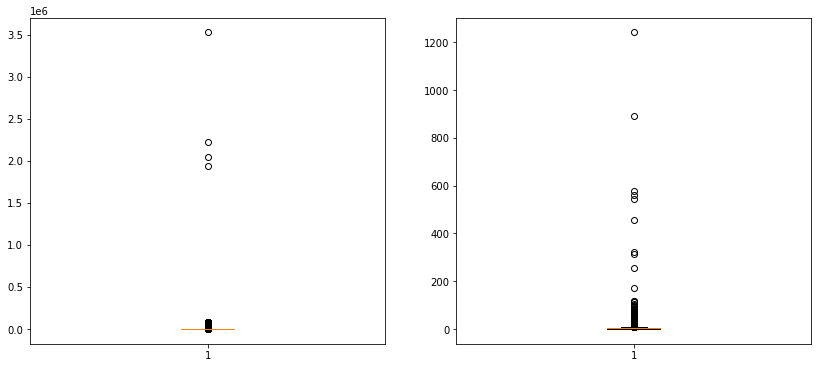

In [15]:
fig = plt.figure(figsize=(14,6), linewidth=2)

ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.boxplot(df['duration'])
ax2.boxplot(df['distance'])


In [16]:
print('Duration skewness:')
print(df['duration'].skew())
print(' ')
print('Distance skewness:')
print(df['distance'].skew())

Duration skewness:
340.46235747285215
 
Distance skewness:
39.62091024380734


Here we note that the skew values tell us that: Each of the features of `Distance` and `Duration` are highly skewed and each have a long right tailed distribution. 

## Removing outliers from `Duration` column 

Let us first work on the duration column. 
We will remove all rows that have `duration` < 60 seconds and `duration` >86300 seconds to include rides that fall within 1day time window.


In [17]:
print(df['duration'].quantile(0.005))
print(df['duration'].quantile(0.998))


51.0
5552.065999999992


In [18]:
#creating the required criterion for above outlier removal and passing it to the df and getting the resulting shape and info.
# proceeding with copying the resulting dataframe into df.

c1 = (df['duration'] < 85188 ) & (df['duration'] > 87)
df = df.loc[c1]
print(df['duration'].skew())
pd.qcut(df['duration'],4)


40.31850480037796


0            (87.999, 404.0]
1            (668.0, 1079.0]
2             (404.0, 668.0]
5            (87.999, 404.0]
6            (87.999, 404.0]
                 ...        
1048463    (1079.0, 85186.0]
1048464    (1079.0, 85186.0]
1048465      (87.999, 404.0]
1048466       (404.0, 668.0]
1048467      (668.0, 1079.0]
Name: duration, Length: 1036817, dtype: category
Categories (4, interval[float64]): [(87.999, 404.0] < (404.0, 668.0] < (668.0, 1079.0] < (1079.0, 85186.0]]

In [19]:
# going with removing the outliers. - below can be used for other kind of computations to replace values.
# df["duration"] = np.where(df["duration"] <110.0, 110.0,df['duration'])
# df["duration"] = np.where(df["duration"] >3443.0, 3443.0,df['duration'])
# print(df['duration'].skew())

In [20]:
pd.options.display.float_format = '{:.3f}'.format
print(df.info())
(df['duration']).describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036817 entries, 0 to 1048467
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1036817 non-null  object        
 1   vendor_id           1036817 non-null  category      
 2   pickup_datetime     1036817 non-null  datetime64[ns]
 3   dropoff_datetime    1036817 non-null  datetime64[ns]
 4   passenger_count     1036817 non-null  int64         
 5   pickup_longitude    1036817 non-null  float64       
 6   pickup_latitude     1036817 non-null  float64       
 7   dropoff_longitude   1036817 non-null  float64       
 8   dropoff_latitude    1036817 non-null  float64       
 9   store_and_fwd_flag  1036817 non-null  bool          
 10  duration            1036817 non-null  int64         
 11  distance            1036817 non-null  float64       
dtypes: bool(1), category(1), datetime64[ns](2), float64(5), int64(2), obje

count   1036817.000
mean        876.448
std        1702.909
min          88.000
25%         404.000
50%         668.000
75%        1079.000
max       85186.000
Name: duration, dtype: float64

1st std deviation is 3185 seconds and 
2nd std deviation is 6370 seconds


## Removing outliers from `Distance` column

### Computing Manhattan distance. 

After much research and even working on computing distance from the geodesic-circle functions available on geopandas library. I figured to make use of the Manhattan distance to perform the computation. I used this open-source-code available at this location to compute the 'manhattan' distance as the computation procedure aptly applies to manhattan location area owing to the perpendicular street ways. 

Ref: https://medium.com/@simplyjk/why-manhattan-distance-formula-doesnt-apply-to-manhattan-7db0ebb1c5f6

In [21]:
def haversine(lat1, lon1, lat2, lon2):     
    # R = 3958.76 # Earth radius in miles    
    R = 6371 # Earth radisu in KM
    dLat, dLon, lat1, lat2 = np.radians(lat2 - lat1), np.radians(lon2 - lon1), np.radians(lat1), np.radians(lat2)     
    
    a =  np.sin(dLat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dLon/2) ** 2     

    c = 2 * np.arcsin(np.sqrt(a))          
    
    return R * c
  
def manhattan_dist(lat1, lon1, lat2, lon2):
    
    # Pickup coordinates
    p = np.stack([lat1, lon1], axis = 1)
    
    # Dropoff coordinates
    d = np.stack([lat2, lon2], axis = 1)
    
    theta1 = np.radians(-28.904)
    theta2 = np.radians(28.904)
    
    ## Rotation matrix
    R1 = np.array([[np.cos(theta1), np.sin(theta1)], 
                   [-np.sin(theta1), np.cos(theta1)]]
                 )
    R2 = np.array([[np.cos(theta2), np.sin(theta2)], 
                   [-np.sin(theta2), np.cos(theta2)]]
                 )
    
    # Rotate Pickup and Dropoff coordinates by -29 degress in World2
    pT = R1 @ p.T  
    dT = R1 @ d.T  
    
    # Coordinates of Hinge point in the rotated world 
    vT = np.stack((pT[0,:], dT[1,:]))
    # Coordinates of Hinge point in the real world 
    v = R2 @ vT

    
    return (haversine(p.T[0], p.T[1], v[0], v[1]) + 
            haversine(v[0], v[1], d.T[0], d.T[1])
           )
  

In [22]:
#passing the parameters to the manhattan_dist function defined in the above cell

df["manhattan_dist"] = manhattan_dist(df["pickup_latitude"], df["pickup_longitude"], df["dropoff_latitude"], df["dropoff_longitude"] )



In [23]:
c2 = (df['manhattan_dist'] >0.010 ) & (df['manhattan_dist'] < 1000)
df1 = df.loc[c2]
df = df1

In [24]:
df[["manhattan_dist", "distance"]].describe()

,manhattan_dist,distance
count,1033660.000,1033660.000
mean,4.531,3.483
std,5.818,4.132
min,0.010,0.007
25%,1.594,1.261
50%,2.661,2.123
75%,4.823,3.919
max,872.887,578.843


1st std deviation is 5.81 Km and and the 2nd std deviation is 11.62 Km

(To revert back the display use # pd.reset_option('^display.', silent=True) ) 


**Note:**

The computed distance based on all reasoning above, has been able to reduce the 'errors' in analysis and reporting and a **75% reduction** in zeros. This output is helps us deal with the outliers in `manhattan_distance` with much less overall deviation.


## Deriving additional columns - `dur_to_dist`

In [25]:
#converting duration to hours 

df = df.copy()

df['duration_hours'] = (df.loc[:,['duration']])/3600
df['duration_min'] = (df.loc[:,['duration']])/60

# computing additional duration to distance column 

df['dur_to_dist_m_hpkm'] = df.loc[:,'duration_hours']/df['manhattan_dist']
df['dur_to_dist_m_spkm'] = df.loc[:,'duration']/df['manhattan_dist']

# computing additional distance to duration column 

df['speed_kmph_m'] = df['manhattan_dist'] /df['duration_hours']

## Deriving Additional columns - `price`

As the taxt ride price is a 'derived column' I am using the inputs available on the NYC webpage to arrive at the price for each of the 1m+ rides present in the dataset. Firstly, planning out the conditional criterion that help derive the price function are presented and grouped below.


### Fare formula calculation is derived from here: 

https://www.numbeo.com/taxi-fare/in/New-York
https://www.estimate.taxi/rates/united-states/new-york and review notes

`Price` is computed as below:

C1. Base price is **$3.50** 

    Additional price for every **1km** is **$1.56**


C2. Waiting time is **$30.00/hour**


C3. Additional Peak rate for (**16:00 - 19:59** on Monday, Tuesday, Wednesday, Thursday, Friday only) of **$1.00**


       Additional night fee of **$0.50**


C4. Including another criterion to passenger count. If passenger count is > 2, price billed is 1.3 times the price computed based on all criterion put together


C5. Further, taxi rates go the highest peak To/From JFK and any location in Manhattan. **$52.00** plus tolls + many surcharges...( this isn't taken )



##  Defining  `price` function per above criterion and values

In [26]:
# C1:  writing a function based on the distance feature. - Distance travelled

    
df['criterion_1'] = np.where(df['manhattan_dist']<0.322, 3.5, 3.5 + (1.56 *(df['manhattan_dist']-0.322)/0.322))
     
# C2: writing a function based on the duration feature. - Waiting time 

    
df['criterion_2'] = np.where(df['store_and_fwd_flag'], 30*df['duration_min']/60, 0)


# C3: obtaining columns of hour and day_name for calculating peak hour time rates. - Peak times

df["day_name"] = df['pickup_datetime'].dt.day_name()
df["hour"] = df['pickup_datetime'].dt.hour

def criterion_3(df):
    if df['hour'] > 16 and df ['hour'] <= 20 and df['day_name'] in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return 1
    elif df['hour'] > 20 and df['hour'] < 6: 
        return 0.5
    else: 
        return 0
    
df['criterion_3'] = df.apply(criterion_3, axis=1) 



In [27]:
df['price']= df['criterion_1']+df['criterion_2']+df['criterion_3']

In [28]:
# C4: writing a function for the price associated with passenger_count.


df['criterion_4'] = np.where((df['passenger_count'] > 2), df['price'] * 1.3, df['price'] * 1)



In [29]:
df['price'] = df['criterion_4']
df[['price','criterion_1','criterion_2','criterion_3']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,1033660.000,25.197,29.762,3.500,10.205,15.669,26.738,4230.833
criterion_1,1033660.000,23.893,28.183,3.500,9.663,14.833,25.307,4230.833
criterion_2,1033660.000,0.050,0.878,0.000,0.000,0.000,0.000,65.200
criterion_3,1033660.000,0.173,0.378,0.000,0.000,0.000,0.000,1.000


Mean price is $25.2.

First standard deviation is $29.76.

Second standard deviation is $59.52 per KM across rides in the dataset.

The Dataset above has all of data points, which are falling outside of the bounds of NYC. A better estimate would be to group datasets into within NYC and outside NYC bounds.

## Parsing datetime column 

In [30]:
# categories as default are unordered, setting the order of category for month and day names
from pandas.api.types import CategoricalDtype

month_cat = CategoricalDtype(categories=["January", "February","March","April","May","June"], ordered = True)
day_cat = CategoricalDtype(categories=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], ordered = True)


In [31]:
# additional columns being parsed.
df["day_name"] = df['pickup_datetime'].dt.day_name().astype(day_cat)
df["month_name"] = df['pickup_datetime'].dt.month_name().astype(month_cat)
df["day"] = df['pickup_datetime'].dt.day

In [32]:
type(df.index)

pandas.core.indexes.numeric.Int64Index

In [33]:
df.info() # 1.03366  Million observations 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033660 entries, 5853 to 1048465
Data columns (total 27 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1033660 non-null  object        
 1   vendor_id           1033660 non-null  category      
 2   pickup_datetime     1033660 non-null  datetime64[ns]
 3   dropoff_datetime    1033660 non-null  datetime64[ns]
 4   passenger_count     1033660 non-null  int64         
 5   pickup_longitude    1033660 non-null  float64       
 6   pickup_latitude     1033660 non-null  float64       
 7   dropoff_longitude   1033660 non-null  float64       
 8   dropoff_latitude    1033660 non-null  float64       
 9   store_and_fwd_flag  1033660 non-null  bool          
 10  duration            1033660 non-null  int64         
 11  distance            1033660 non-null  float64       
 12  manhattan_dist      1033660 non-null  float64       
 13  duration_

## Saving the new dataset  with additional features and outliers removed

In [34]:
df = df.drop(columns=[col for col in df.columns if 'criterion' in col])
print(df.shape)
print(df.info())

(1033660, 23)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033660 entries, 5853 to 1048465
Data columns (total 23 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1033660 non-null  object        
 1   vendor_id           1033660 non-null  category      
 2   pickup_datetime     1033660 non-null  datetime64[ns]
 3   dropoff_datetime    1033660 non-null  datetime64[ns]
 4   passenger_count     1033660 non-null  int64         
 5   pickup_longitude    1033660 non-null  float64       
 6   pickup_latitude     1033660 non-null  float64       
 7   dropoff_longitude   1033660 non-null  float64       
 8   dropoff_latitude    1033660 non-null  float64       
 9   store_and_fwd_flag  1033660 non-null  bool          
 10  duration            1033660 non-null  int64         
 11  distance            1033660 non-null  float64       
 12  manhattan_dist      1033660 non-null  float64       


In [35]:
### Saving the dataframe 
df = df.reset_index()
df.to_csv('./data/2_new_features_outliers_removed.csv')

--------------------

# Descriptive Statistics


##  Let’s understand the scope and distribution various dimensions within the dataset. 

Calculate the average, median, and the first & second standard deviation of the mean for the following measures:
1. duration
2. distance 
3. passenger counts 
4. duration-to-distance ratio 
5. price


In [36]:
# Loading the taxi_rides data into the pandas Dataframe

df = pd.read_csv('./data/2_new_features_outliers_removed.csv')

In [37]:
#creating a dataframe for purposes of figuring the data statistics

pd.options.display.float_format = '{:.2f}'.format

df[["duration","duration_hours", "passenger_count",'price','manhattan_dist','dur_to_dist_m_hpkm', 'dur_to_dist_m_spkm']].describe().T


,count,mean,std,min,25%,50%,75%,max
duration,1033660.00,876.79,1699.74,88.00,404.00,668.00,1080.00,85186.00
duration_hours,1033660.00,0.24,0.47,0.02,0.11,0.19,0.30,23.66
passenger_count,1033660.00,1.67,1.31,0.00,1.00,1.00,2.00,8.00
price,1033660.00,25.20,29.76,3.50,10.21,15.67,26.74,4230.83
manhattan_dist,1033660.00,4.53,5.82,0.01,1.59,2.66,4.82,872.89
dur_to_dist_m_hpkm,1033660.00,0.09,0.60,0.00,0.04,0.06,0.09,258.04
dur_to_dist_m_spkm,1033660.00,314.06,2157.11,0.44,158.78,223.38,314.23,928938.22


<AxesSubplot:xlabel='passenger_count', ylabel='count'>

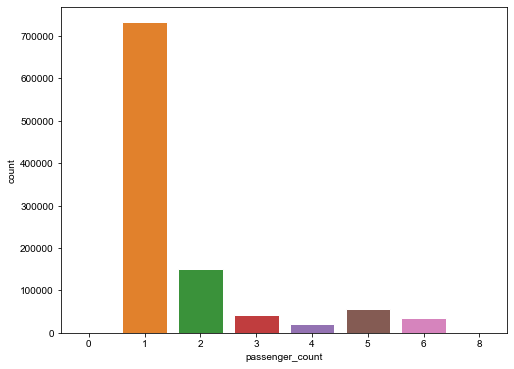

In [38]:
fig,ax = plt.subplots(1,figsize =(8,6))


sns.set_style('whitegrid')

sns.countplot(ax=ax, data=df, x ='passenger_count' ) #color='C0'

# # Iterrating over the bars one-by-one
# for bar in count.patches:
    
#   # Using Matplotlib's annotate function and
#   # passing the coordinates where the annotation shall be done
#   # x-coordinate: bar.get_x() + bar.get_width() / 2
#   # y-coordinate: bar.get_height()
#   # free space to be left to make graph pleasing: (0, 8)
#   # ha and va stand for the horizontal and vertical alignment
#     plt.annotate(format(bar.get_height(), '.2f'), 
#                    (bar.get_x() + bar.get_width() / 2, 
#                     bar.get_height()), ha='center', va='center',
#                    size=15, xytext=(8, 0),
#                    textcoords='offset points')


Low Volume picks ups that constitute **(1-2 passengers) comprise 85%** of the entire dataset ~ 895K riders.


In [39]:
print(df.shape)


(1033660, 25)


In [58]:
df[["duration","duration_hours", "passenger_count",'price','manhattan_dist','dur_to_dist_m_hpkm','dur_to_dist_m_spkm']].corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('YlGnBu'),axis=1)

#this correlation matrix shows a high +ve of price to duration

,duration,duration_hours,passenger_count,price,manhattan_dist,dur_to_dist_m_hpkm,dur_to_dist_m_spkm
duration,1.0,1.0,0.012,0.29,0.29,0.3,0.3
duration_hours,1.0,1.0,0.012,0.29,0.29,0.3,0.3
passenger_count,0.012,0.012,1.0,0.087,0.0096,0.0032,0.0032
price,0.29,0.29,0.087,1.0,0.99,-0.042,-0.042
manhattan_dist,0.29,0.29,0.0096,0.99,1.0,-0.044,-0.044
dur_to_dist_m_hpkm,0.3,0.3,0.0032,-0.042,-0.044,1.0,1.0
dur_to_dist_m_spkm,0.3,0.3,0.0032,-0.042,-0.044,1.0,1.0


***Note:**
    
    

## Distribution of `Distance` and `Duration` features

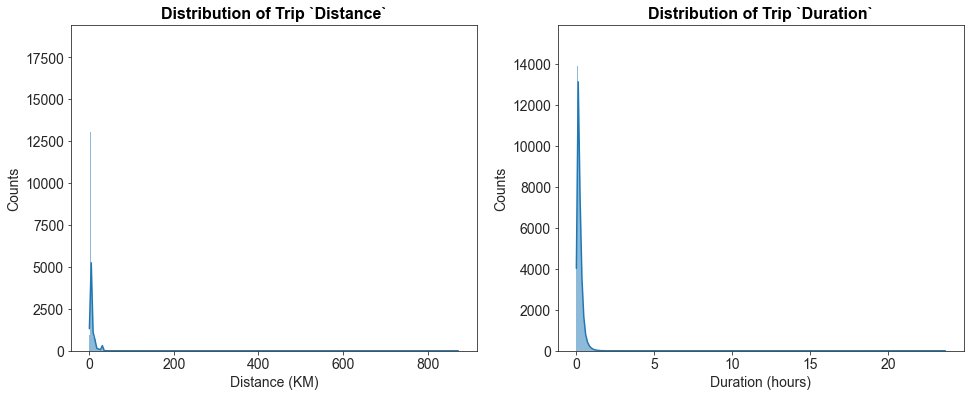

In [41]:
fig = plt.figure(figsize=(16,6))

sns.set_style('whitegrid')
sns.set_style("ticks")

# Plot 1
ax1=fig.add_subplot(121)

plt.xlabel('Distance (KM)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip `Distance`', color='black', fontsize=16,  weight='bold')

ax1 = sns.histplot(data=df,x='manhattan_dist', kde=True)

# Plot 2
ax2=fig.add_subplot(122)

plt.xlabel('Duration (hours)', fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip `Duration`', color='black', fontsize=16,  weight='bold')

ax2 = sns.histplot(data = df, x='duration_hours', kde=True)


## Trend line of taxi rides data 

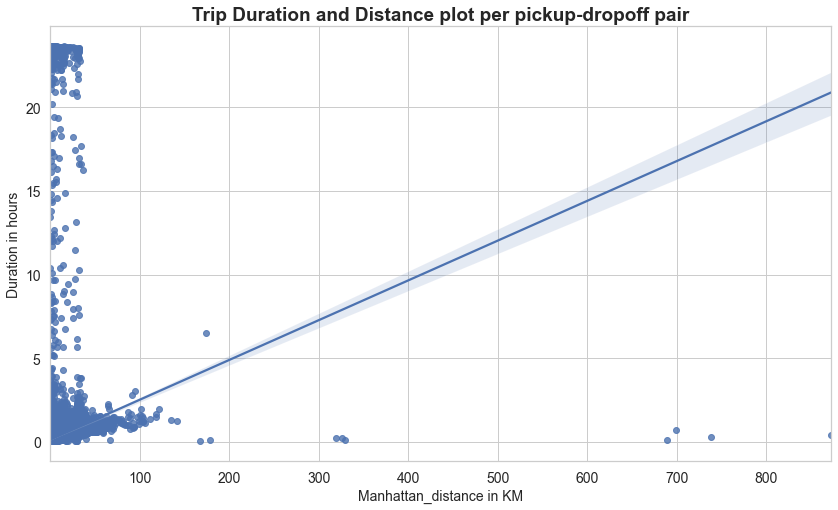

In [42]:
from matplotlib import style
# plt.style.use('ggplot')
sns.set_theme(style="whitegrid")



fig,ax = plt.subplots(1, figsize=(14,8))


ax.set_title('Trip Duration and Distance plot per pickup-dropoff pair', fontsize=19, weight='bold' )

sns.regplot(x="manhattan_dist", y="duration_hours", data=df, ax=ax)

plt.xlabel('Manhattan_distance in KM', fontsize=14)
plt.ylabel('Duration in hours',fontsize=14)
plt.tick_params(labelsize=14)


---------------------

### others 

### Distance and Duration Viz - innyc
Output loaded from the geographical analysis of pickup points - book 2

In [43]:
inp_df = pd.read_csv('./data/joined_innyc_p.csv')

In [44]:
print(inp_df.info())
inp_df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018105 entries, 0 to 1018104
Data columns (total 29 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Unnamed: 0          1018105 non-null  int64  
 1   Unnamed: 0.1        1018105 non-null  int64  
 2   id                  1018105 non-null  object 
 3   vendor_id           1018105 non-null  int64  
 4   pickup_datetime     1018105 non-null  object 
 5   dropoff_datetime    1018105 non-null  object 
 6   passenger_count     1018105 non-null  int64  
 7   pickup_longitude    1018105 non-null  float64
 8   pickup_latitude     1018105 non-null  float64
 9   dropoff_longitude   1018105 non-null  float64
 10  dropoff_latitude    1018105 non-null  float64
 11  store_and_fwd_flag  1018105 non-null  bool   
 12  duration            1018105 non-null  int64  
 13  distance            1018105 non-null  float64
 14  manhattan_dist      1018105 non-null  float64
 15  duration_hours 

,Unnamed: 0,Unnamed: 0.1,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,...,speed_kmph_m,day_name,hour,price,month_name,day,geometry,index_right,zcta,bcode
0,0,0,id2966204,1,2016-05-01 10:37:00,2016-05-01 10:41:00,1,-73.94,40.81,-73.94,...,0.15,Sunday,10,3.50,May,1,POINT (-73.93926239 40.80500793),28.00,10035,36061
1,1,1,id3871388,1,2016-06-13 09:46:00,2016-06-13 09:47:00,1,-73.95,40.75,-73.95,...,0.41,Monday,9,3.50,June,13,POINT (-73.94538879 40.75161743),111.00,11101,36081
2,2,2,id2922653,1,2016-05-02 11:27:00,2016-05-02 11:36:00,1,-74.02,40.70,-74.02,...,0.08,Monday,11,3.50,May,2,POINT (-74.01707458 40.70493317),6.00,10004,36061
3,3,3,id3882784,1,2016-03-21 08:11:00,2016-03-21 08:14:00,1,-73.90,40.76,-73.90,...,0.21,Monday,8,3.50,March,21,POINT (-73.9021225 40.76398849),181.00,11377,36081
4,4,4,id3958254,2,2016-04-19 13:59:00,2016-04-19 14:01:00,1,-73.94,40.76,-73.94,...,0.31,Tuesday,13,3.50,April,19,POINT (-73.93682097999999 40.76457596),105.00,11106,36081


In [45]:
inp_df[["duration_hours", "passenger_count",'price','manhattan_dist','dur_to_dist_m_hpkm']].describe().T


,count,mean,std,min,25%,50%,75%,max
duration_hours,1018105.00,0.24,0.47,0.02,0.11,0.19,0.30,23.66
passenger_count,1018105.00,1.66,1.31,0.00,1.00,1.00,2.00,8.00
price,1018105.00,25.27,29.78,3.50,10.20,15.69,26.84,4230.83
manhattan_dist,1018105.00,4.55,5.83,0.01,1.59,2.67,4.84,872.89
dur_to_dist_m_hpkm,1018105.00,0.09,0.60,0.00,0.04,0.06,0.09,258.04


In [46]:
inp_df[["duration_hours", "passenger_count",'price','manhattan_dist','dur_to_dist_m_hpkm']].corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('YlGnBu'),axis=1)

,duration_hours,passenger_count,price,manhattan_dist,dur_to_dist_m_hpkm
duration_hours,1.0,0.012,0.29,0.29,0.3
passenger_count,0.012,1.0,0.088,0.0097,0.0031
price,0.29,0.088,1.0,0.99,-0.042
manhattan_dist,0.29,0.0097,0.99,1.0,-0.044
dur_to_dist_m_hpkm,0.3,0.0031,-0.042,-0.044,1.0


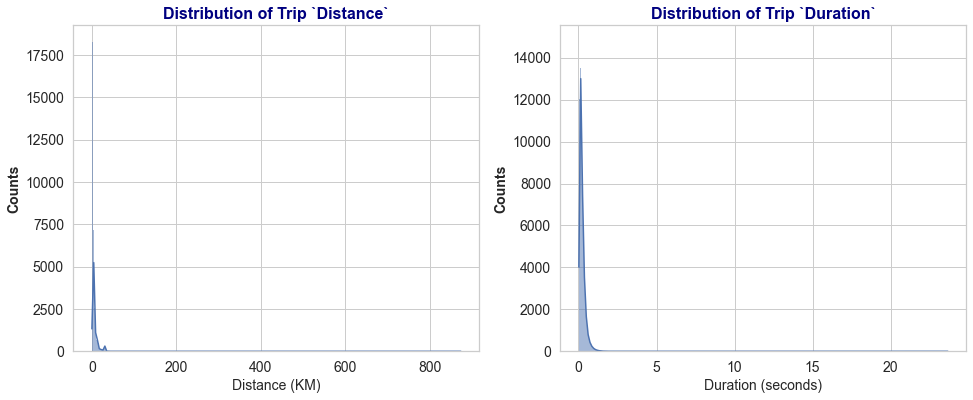

In [47]:
fig = plt.figure(figsize=(16,6))

# Plot 1
ax1 = plt.subplot(121)

plt.xlabel('Distance (KM)', fontsize=14)
plt.ylabel('Counts', fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip `Distance`', color='navy', fontsize=16,  weight='bold')

# plt.xlim([-1,30])
ax1= sns.histplot(data= inp_df, x='manhattan_dist', kde=True)

# ax1.set_xticks(range(-1,30))

# Plot 2
ax2 = plt.subplot(122)

plt.xlabel('Duration (seconds)', fontsize=14)
plt.ylabel('Counts',fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip `Duration`', color='navy', fontsize=16,  weight='bold')

# plt.xlim([0,6200])
ax2= sns.histplot(data=inp_df, x='duration_hours', kde=True)

<AxesSubplot:title={'center':'Trip Duration and Distance plot per pickup-dropoff pair'}, xlabel='manhattan_dist', ylabel='duration_hours'>

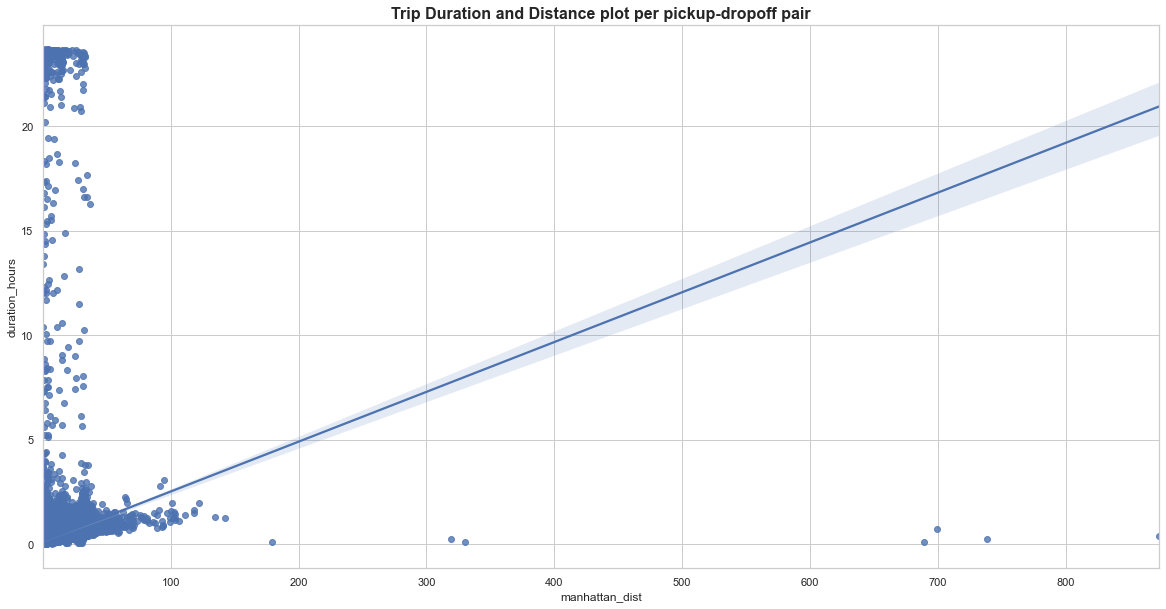

In [48]:
fig,ax = plt.subplots(1, figsize=(20,10))

ax.set_xlabel('hour')
ax.set_title('Trip Duration and Distance plot per pickup-dropoff pair',fontsize=16,  weight='bold' )

sns.regplot(x="manhattan_dist", y="duration_hours", data=inp_df, ax=ax)

### Distance and Duration viz - outliers
Output loaded from the geographical analysis of pickup points - book 2

In [49]:
outp_df = pd.read_csv('./data/joined_outnyc_p.csv')

In [50]:
print(outp_df.info())
outp_df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15555 entries, 0 to 15554
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          15555 non-null  int64  
 1   Unnamed: 0.1        15555 non-null  int64  
 2   id                  15555 non-null  object 
 3   vendor_id           15555 non-null  int64  
 4   pickup_datetime     15555 non-null  object 
 5   dropoff_datetime    15555 non-null  object 
 6   passenger_count     15555 non-null  int64  
 7   pickup_longitude    15555 non-null  float64
 8   pickup_latitude     15555 non-null  float64
 9   dropoff_longitude   15555 non-null  float64
 10  dropoff_latitude    15555 non-null  float64
 11  store_and_fwd_flag  15555 non-null  bool   
 12  duration            15555 non-null  int64  
 13  distance            15555 non-null  float64
 14  manhattan_dist      15555 non-null  float64
 15  duration_hours      15555 non-null  float64
 16  dura

,Unnamed: 0,Unnamed: 0.1,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,...,speed_kmph_m,day_name,hour,price,month_name,day,geometry,index_right,zcta,bcode
0,50,50,id2203135,2,2016-01-14 11:08:00,2016-01-14 11:30:00,1,-73.97,40.77,-73.97,...,0.04,Thursday,11,3.50,January,14,POINT (-73.97315979 40.76903152),NaN,NaN,NaN
1,52,52,id2714028,1,2016-03-10 03:33:00,2016-03-10 03:42:00,1,-74.03,40.75,-74.03,...,0.11,Thursday,3,3.50,March,10,POINT (-74.03298187 40.74647522),NaN,NaN,NaN
2,53,53,id1162751,1,2016-03-02 21:56:00,2016-03-02 21:59:00,1,-74.08,40.23,-74.08,...,0.37,Wednesday,21,3.50,March,2,POINT (-74.07517242 40.22579956),NaN,NaN,NaN
3,94,94,id0494126,1,2016-05-17 08:47:00,2016-05-17 09:09:00,1,-73.96,40.78,-73.96,...,0.03,Tuesday,8,3.50,May,17,POINT (-73.96027374000001 40.78171539),NaN,NaN,NaN
4,97,97,id1246488,2,2016-03-23 12:14:00,2016-03-23 12:16:00,1,-73.98,40.77,-73.98,...,0.46,Wednesday,12,3.50,March,23,POINT (-73.98154449 40.7677536),NaN,NaN,NaN


In [51]:
outp_df[["duration_hours", "passenger_count",'price','manhattan_dist','dur_to_dist_m_hpkm']].describe().T


,count,mean,std,min,25%,50%,75%,max
duration_hours,15555.00,0.23,0.31,0.02,0.11,0.18,0.29,23.57
passenger_count,15555.00,1.74,1.37,0.00,1.00,1.00,2.00,6.00
price,15555.00,20.38,28.47,3.50,10.46,14.69,21.61,2058.56
manhattan_dist,15555.00,3.55,5.15,0.01,1.64,2.45,3.78,326.45
dur_to_dist_m_hpkm,15555.00,0.10,0.56,0.00,0.05,0.07,0.09,30.09


In [52]:
outp_df[["duration_hours", "passenger_count",'price','manhattan_dist','dur_to_dist_m_hpkm']].corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('YlGnBu'),axis=1)

,duration_hours,passenger_count,price,manhattan_dist,dur_to_dist_m_hpkm
duration_hours,1.0,0.0089,0.32,0.34,0.16
passenger_count,0.0089,1.0,0.082,0.014,0.009
price,0.32,0.082,1.0,0.99,-0.037
manhattan_dist,0.34,0.014,0.99,1.0,-0.042
dur_to_dist_m_hpkm,0.16,0.009,-0.037,-0.042,1.0


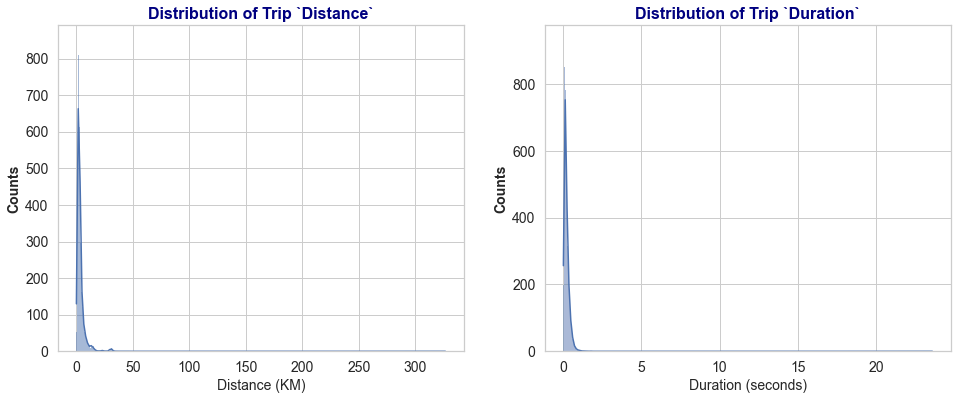

In [53]:
fig = plt.figure(figsize=(16,6))

# Plot 1
ax1 = plt.subplot(121)

plt.xlabel('Distance (KM)', fontsize=14)
plt.ylabel('Counts', fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip `Distance`', color='navy', fontsize=16,  weight='bold')

# plt.xlim([-1,30])
ax1= sns.histplot(data= outp_df, x='manhattan_dist', kde=True)

# ax1.set_xticks(range(-1,30))

# Plot 2
ax2 = plt.subplot(122)

plt.xlabel('Duration (seconds)', fontsize=14)
plt.ylabel('Counts',fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip `Duration`', color='navy', fontsize=16,  weight='bold')

# plt.xlim([0,6200])
ax2= sns.histplot(data=outp_df, x='duration_hours', kde=True)

<AxesSubplot:title={'center':'Trip Duration and Distance plot per pickup-dropoff pair'}, xlabel='manhattan_dist', ylabel='duration_hours'>

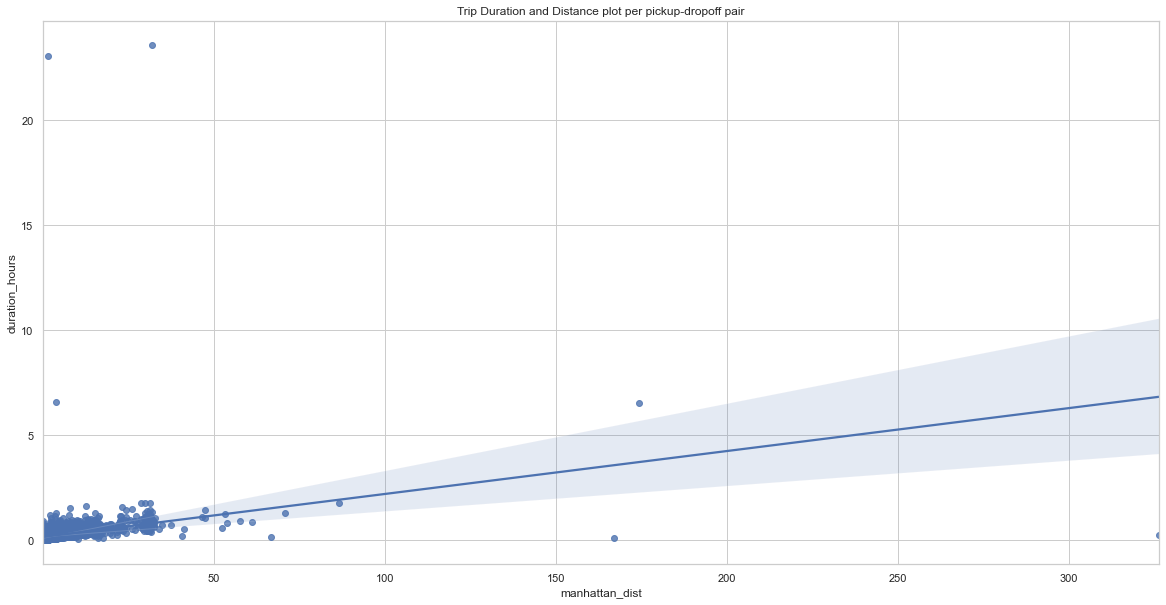

In [54]:
fig,ax = plt.subplots(1, figsize=(20,10))

ax.set_xlabel('hour')
ax.set_title('Trip Duration and Distance plot per pickup-dropoff pair')

sns.regplot(x="manhattan_dist", y="duration_hours", data=outp_df, ax=ax)

In [55]:
inp_df_manhattan = inp_df.query('bcode == 36061')


In [56]:
inp_df_manhattan['zcta'].value_counts()

10019    66780
10022    55759
10003    54031
10016    53621
10011    53268
         ...  
10034      150
10040       87
10044       65
10271       48
10115       10
Name: zcta, Length: 69, dtype: int64

In [57]:
inp_df_manhattan['dur_to_dist_m_spkm'].describe()

count   939470.00
mean       318.61
std       1886.19
min          0.44
25%        167.00
50%        231.08
75%        322.25
max     700912.65
Name: dur_to_dist_m_spkm, dtype: float64